In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
#Loading the diabetes data for mini-challenge and splitting it into train & test.
df = pd.read_csv('../data/diabetes.csv')
X = df.drop('diabetes',axis=1)
y = df['diabetes']
X_train,X_test,y_train,y_test = train_test_split(X,y)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
Check for class imbalance using a count plot.

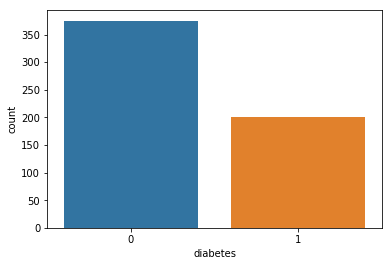

In [4]:
sns.countplot(y_train)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
Fit a Random Forest Classifier on the imbalanced data. Find out the f1-score, precision score, recall score, roc-auc score, confusion matrix.

In [5]:
rf_classifier_bal = RandomForestClassifier(max_depth=5)
rf_classifier_bal.fit(X_train,y_train)
print ("f1_score", f1_score(y_test, rf_classifier_bal.predict(X_test)))
print (precision_score(y_test, rf_classifier_bal.predict(X_test)))
print (recall_score(y_test, rf_classifier_bal.predict(X_test)))
print (roc_auc_score(y_test, rf_classifier_bal.predict(X_test)))
print (confusion_matrix(y_test, rf_classifier_bal.predict(X_test)))

f1_score 0.588235294117647
0.6730769230769231
0.5223880597014925
0.6931940298507463
[[108  17]
 [ 32  35]]


/home/bharatmishra/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
Oversample the minority classes using SMOTE.

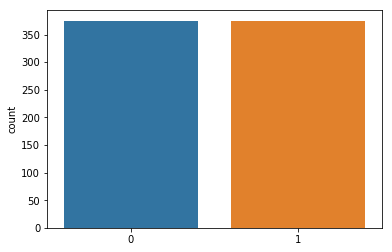

In [6]:
#SMOTE using imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=9, kind="borderline2")
X_train_balanced, y_train_balanced = smote.fit_sample(X_train, y_train)
sns.countplot(y_train_balanced)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
Fit a Random Forest Classifier on the balanced data. Find out the f1-score, precision score, recall score, roc-auc score, confusion matrix.
Notice the increase in the f1-scores.

In [7]:
rf_classifier_unbal = RandomForestClassifier(max_depth=5)
rf_classifier_unbal.fit(X_train_balanced,y_train_balanced)
print ("f1_score", f1_score(y_test, rf_classifier_unbal.predict(X_test)))
print (precision_score(y_test, rf_classifier_unbal.predict(X_test)))
print (recall_score(y_test, rf_classifier_unbal.predict(X_test)))
print (roc_auc_score(y_test, rf_classifier_unbal.predict(X_test)))
print (confusion_matrix(y_test, rf_classifier_unbal.predict(X_test)))

f1_score 0.6666666666666667
0.5930232558139535
0.7611940298507462
0.7405970149253731
[[90 35]
 [16 51]]


/home/bharatmishra/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
